Pull data from both data sources and merge into one dataframe

In [1]:
import pandas as pd
import csv

abrv = 'CHI'
chi_weather_data = pd.read_csv(f'{abrv}_weather_data.csv', index_col='date', parse_dates=True)

chi_ridership_data = pd.read_csv('CTA_Daily_Boarding_Totals.csv', index_col='service_date', parse_dates=True)

# join ridership and weather data on date index
chi_data = chi_ridership_data.join(chi_weather_data)

# drop empty columns
chi_data.drop(['avg_hum','avg_wind','avg_pres','hi_precip','lo_precip'], axis=1, inplace=True)

# drop days with erroneous data; happens to be last two data points
chi_data.drop(chi_data['2018-06-29':].index, axis=0, inplace=True)

Let's check the distributions of our variables by plotting histograms

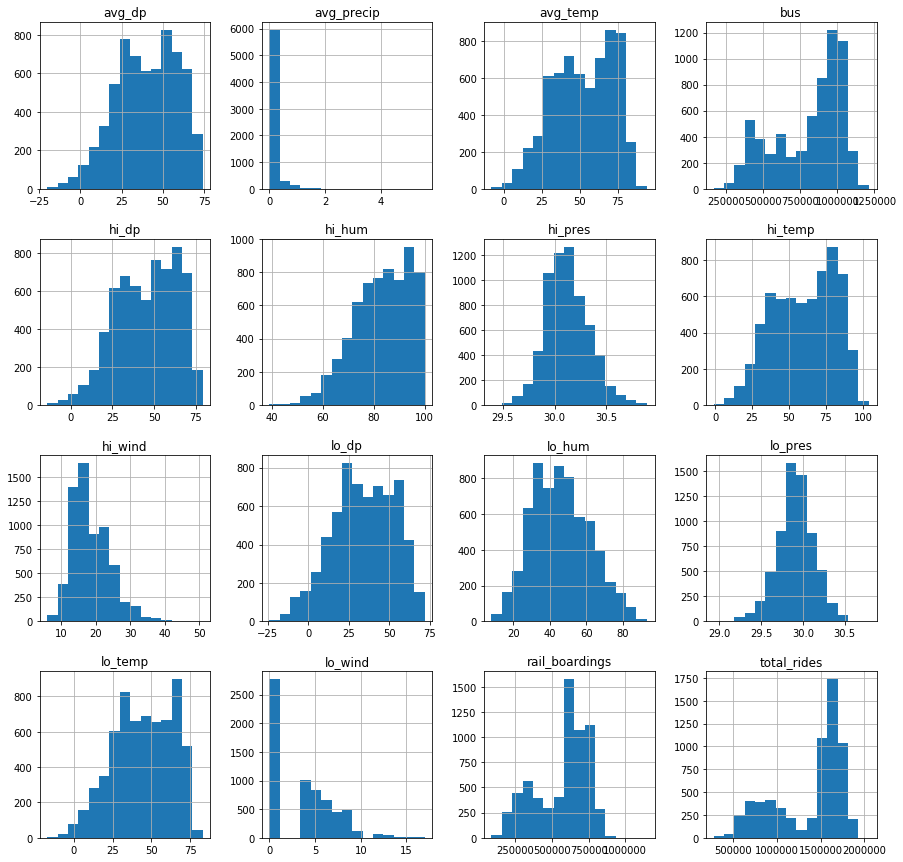

In [4]:
pd.DataFrame.hist(data=chi_data, figsize=(15,15), layout=(4,4), bins=15);

We use the corr feature of pandas to check for collinearity amongst the variables

In [37]:
chi_data.corr()

,bus,rail_boardings,total_rides,hi_temp,avg_temp,lo_temp,hi_dp,avg_dp,lo_dp,hi_hum,lo_hum,hi_wind,lo_wind,hi_pres,lo_pres,avg_precip
bus,1.000000,0.833156,0.967843,0.076111,0.078287,0.082132,0.067187,0.069497,0.073415,-0.011816,-0.004697,-0.070426,-0.022333,-0.074318,-0.035355,-0.035542
rail_boardings,0.833156,1.000000,0.945484,0.157478,0.164543,0.162607,0.145312,0.148830,0.151040,-0.034368,-0.119884,0.061017,-0.032754,-0.097324,-0.047434,0.004571
total_rides,0.967843,0.945484,1.000000,0.116451,0.120945,0.122329,0.105662,0.108622,0.111934,-0.022591,-0.057297,-0.013718,-0.028050,-0.088033,-0.042395,-0.018850
hi_temp,0.076111,0.157478,0.116451,1.000000,0.989157,0.955673,0.928781,0.929432,0.909693,-0.016139,-0.305179,-0.016641,-0.248611,-0.499925,-0.222107,0.122397
avg_temp,0.078287,0.164543,0.120945,0.989157,1.000000,0.987521,0.947149,0.956337,0.943693,0.016948,-0.242025,-0.023858,-0.238624,-0.520389,-0.229352,0.136574
lo_temp,0.082132,0.162607,0.122329,0.955673,0.987521,1.000000,0.943753,0.962915,0.959638,0.051670,-0.165296,-0.041223,-0.226201,-0.528243,-0.227380,0.148044
hi_dp,0.067187,0.145312,0.105662,0.928781,0.947149,0.943753,1.000000,0.984068,0.944266,0.266869,-0.015181,0.041015,-0.214766,-0.569254,-0.355890,0.247965
avg_dp,0.069497,0.148830,0.108622,0.929432,0.956337,0.962915,0.984068,1.000000,0.980421,0.256196,0.013868,-0.011030,-0.242868,-0.572833,-0.316054,0.240000
lo_dp,0.073415,0.151040,0.111934,0.909693,0.943693,0.959638,0.944266,0.980421,1.000000,0.212756,0.026928,-0.065422,-0.261547,-0.548634,-0.257735,0.202403
hi_hum,-0.011816,-0.034368,-0.022591,-0.016139,0.016948,0.051670,0.266869,0.256196,0.212756,1.000000,0.608873,0.063623,-0.113903,-0.255127,-0.349022,0.366374


Whoa, that's a lot of numbers to digest. Let's bring some color into our lives:

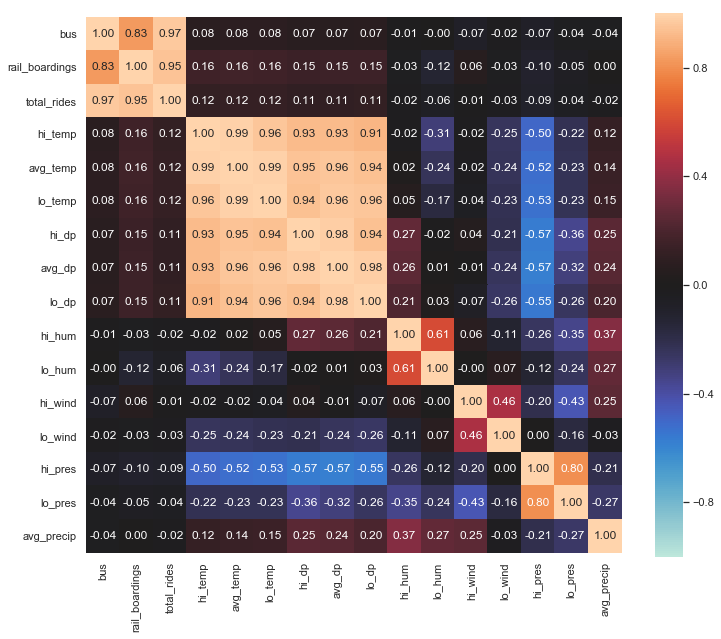

In [38]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(chi_data.corr(), fmt='.2f', center=0, vmin=-1, vmax=1, annot=True, square=True);

Here, at a glance, we can easily see that the all the temperature and dew point variables are highly collinear, as well as each hi-lo pair of the other weather variables. Furthermore, I addressed this by converting hi-lo variables to midpoint-variability variables, and fo temperauter and humidity, having three variables each, hi-avg-lo, these become midpoint-variability-bias so as to not lose any information. Furthermore

In [41]:
temp = chi_data.head(10)

In [42]:
temp.columns

Index(['day_type', 'bus', 'rail_boardings', 'total_rides', 'hi_temp',
       'avg_temp', 'lo_temp', 'hi_dp', 'avg_dp', 'lo_dp', 'hi_hum', 'lo_hum',
       'hi_wind', 'lo_wind', 'hi_pres', 'lo_pres', 'avg_precip'],
      dtype='object')

In [ ]:
temp['hi_temp', 'avg_temp', 'lo_temp', 'hi_dp', 'avg_dp', 'lo_dp',]